## N-Asset Efficient Frontier

In [29]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import edhec_risk_kit as erk
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
vol = erk.annualize_vol(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


```python

def plot_ef2(n_points, er, cov, style=".-"):
    """
    plot the N-asset efficient frontier
    """
    weights = ????? minimize vol for a certain target return ???? # not yet implemted
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({"Returns":rets,"Volatility":vols})
    
    return ef.plot.line(x="Volatility", y="Returns", style=style)

```

In [2]:
# for the minimization, we are going to use the quadratique optimizer built in scipy
from scipy.optimize import minimize

<AxesSubplot:xlabel='Volatility'>

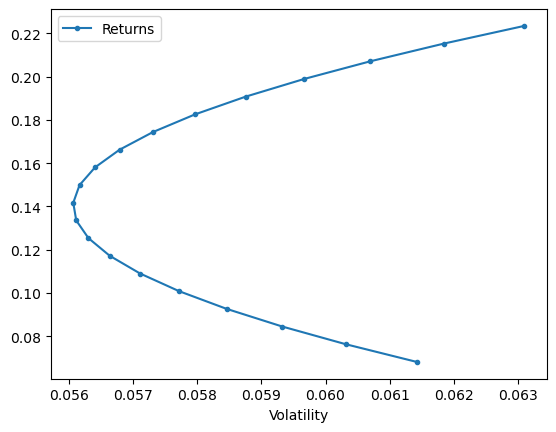

In [3]:
l = ["Fin", "Games"]
erk.plot_ef2(20, er[l], cov.loc[l,l])

In [4]:
import numpy as np

def minimize_vol(target_return, er, cov):
    """
    target_ret --> w
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n) # could be whatever we like but sum equals 1
    bounds = ((0.0,1.0), )*n # tuple of tuple
    return_is_target = {
        'type':'eq',
        'args': (er,),
        'fun': lambda weights, er: target_return - erk.portfolio_return(weights, er)
    }
    weights_sum_to_1 = {
        'type':'eq',
        'fun': lambda weights: np.sum(weights) - 1
    }
    
    results = minimize(erk.portfolio_vol, init_guess,
                       args= (cov,), method="SLSQP",
                       options={'disp': False},
                       constraints = (return_is_target, weights_sum_to_1),
                       bounds = bounds
                      )
    return results.x

In [5]:
w15 = erk.minimize_vol(0.15, er[l], cov.loc[l,l])
vol15 = erk.portfolio_vol(w15, cov.loc[l,l])
vol15

0.056163669406706564

In [6]:
w15

array([0.52712369, 0.47287631])

In [7]:
import pandas as pd
def optimal_weights(n_points, er, cov):
    """
    --> list of weigths to run the optimizer on to minimize the vol
    """
    target_rets = np.linspace(er.min(), er.max(), n_points)
    weights = [minimize_vol(target_return, er, cov) for target_return in target_rets]
    return weights
    
def plot_ef(n_points, er, cov, style=".-"):
    """
    plot the N-asset efficient frontier
    """
    weights = optimal_weights(n_points, er, cov)
    rets = [erk.portfolio_return(w, er) for w in weights]
    vols = [erk.portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({"Returns":rets,"Volatility":vols})
    
    return ef.plot.line(x="Volatility", y="Returns", style=style)


<AxesSubplot:xlabel='Volatility'>

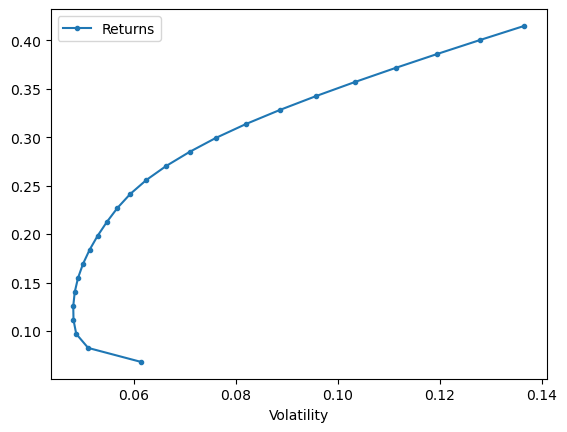

In [8]:
l = ['Fin', 'Games', 'Smoke', 'Coal', 'Beer']
plot_ef(25, er[l], cov.loc[l,l])

<AxesSubplot:xlabel='Volatility'>

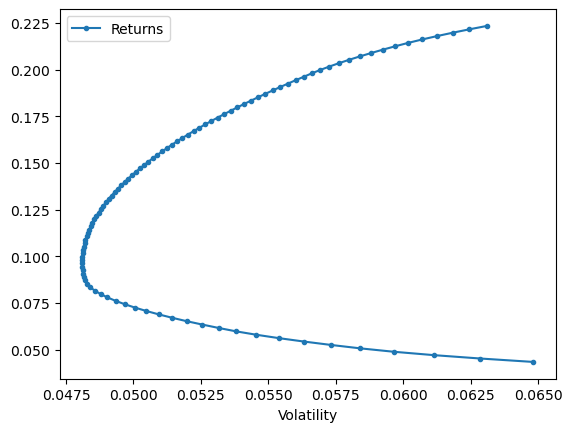

In [9]:
l = ['Fin', 'Games', 'Smoke', 'Other', 'Beer']
plot_ef(100, er[l], cov.loc[l,l])

In [10]:
cov

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002609,0.002379,0.002061,0.000846,0.001035,0.001374,0.001733,0.001230,0.001414,0.001216,...,0.000667,0.000237,-0.000315,0.001429,0.001534,0.000740,0.001363,0.001230,0.002132,0.001057
Beer,0.002379,0.005264,0.001359,0.001348,0.000865,0.002804,0.001704,0.001955,0.001460,0.002005,...,0.001146,0.000438,0.000007,0.001710,0.002284,0.000697,0.001690,0.001822,0.002571,0.001383
Smoke,0.002061,0.001359,0.008349,0.000379,-0.000128,0.001167,0.000950,0.001038,0.000853,0.000779,...,0.000062,-0.000218,-0.000120,0.001327,0.000396,0.001707,0.000105,0.000703,0.001312,0.001741
Games,0.000846,0.001348,0.000379,0.003773,0.001726,0.001206,0.002189,0.001433,0.001775,0.001422,...,0.001922,0.002848,0.003434,0.001852,0.001578,0.001966,0.001872,0.001561,0.002416,0.002382
Books,0.001035,0.000865,-0.000128,0.001726,0.002612,0.001025,0.002361,0.000758,0.001731,0.001459,...,0.001918,0.002367,0.001944,0.001638,0.001776,0.001392,0.002223,0.001189,0.002261,0.001442
Hshld,0.001374,0.002804,0.001167,0.001206,0.001025,0.003300,0.001320,0.001473,0.001413,0.001364,...,0.001060,0.001310,0.001102,0.001873,0.001582,0.000683,0.001378,0.001202,0.001912,0.001580
Clths,0.001733,0.001704,0.000950,0.002189,0.002361,0.001320,0.005655,0.000834,0.002932,0.002472,...,0.001436,0.001625,0.000834,0.003165,0.002862,0.001934,0.003013,0.002721,0.003210,0.002299
Hlth,0.001230,0.001955,0.001038,0.001433,0.000758,0.001473,0.000834,0.002565,0.000474,0.000608,...,0.001204,0.001651,0.001535,0.000650,0.000944,0.001056,0.000869,0.000986,0.001617,0.001258
Chems,0.001414,0.001460,0.000853,0.001775,0.001731,0.001413,0.002932,0.000474,0.003276,0.001868,...,0.001004,0.001203,0.001031,0.002920,0.002196,0.001404,0.001808,0.001646,0.002469,0.002059
Txtls,0.001216,0.002005,0.000779,0.001422,0.001459,0.001364,0.002472,0.000608,0.001868,0.003117,...,0.000907,0.000666,0.000702,0.002058,0.001929,0.001610,0.001805,0.001250,0.001986,0.001811


In [11]:
er[l]

Fin      0.223371
Games    0.068212
Smoke    0.107830
Other    0.043349
Beer     0.141126
dtype: float64

In [12]:
ind.describe()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
count,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,...,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000
mean,0.009599,0.011936,0.011345,0.011290,0.008894,0.009156,0.009309,0.010789,0.010497,0.009557,...,0.008464,0.012075,0.011227,0.010142,0.009181,0.008110,0.010325,0.010603,0.010118,0.007828
std,0.047335,0.071858,0.058083,0.089166,0.071548,0.058013,0.060833,0.055629,0.062938,0.076786,...,0.045916,0.083140,0.067517,0.058596,0.070714,0.073102,0.059678,0.064667,0.067788,0.067585
min,-0.283800,-0.291900,-0.249300,-0.442200,-0.303800,-0.349700,-0.309000,-0.340800,-0.333000,-0.325100,...,-0.215600,-0.508500,-0.317900,-0.292900,-0.345700,-0.438500,-0.304100,-0.313300,-0.400200,-0.326300
25%,-0.013100,-0.021325,-0.022900,-0.032300,-0.023600,-0.018825,-0.021750,-0.018875,-0.024000,-0.030500,...,-0.014300,-0.022575,-0.025375,-0.023000,-0.026900,-0.025225,-0.020675,-0.024200,-0.020875,-0.026000
50%,0.011250,0.009850,0.012800,0.011650,0.007600,0.010600,0.009700,0.011050,0.010600,0.010300,...,0.009050,0.011550,0.011900,0.011700,0.010350,0.010950,0.009850,0.012850,0.012500,0.008450
75%,0.034475,0.044075,0.045475,0.056900,0.041475,0.041025,0.039875,0.040350,0.044600,0.050075,...,0.032175,0.045550,0.049875,0.042450,0.043700,0.042175,0.042800,0.046125,0.043750,0.045275
max,0.333000,0.876100,0.330400,0.666800,0.520000,0.583300,0.414000,0.371300,0.466000,0.590400,...,0.281700,0.735400,0.389500,0.431300,0.653800,0.576400,0.435100,0.306500,0.594800,0.457300


<AxesSubplot:xlabel='Volatility'>

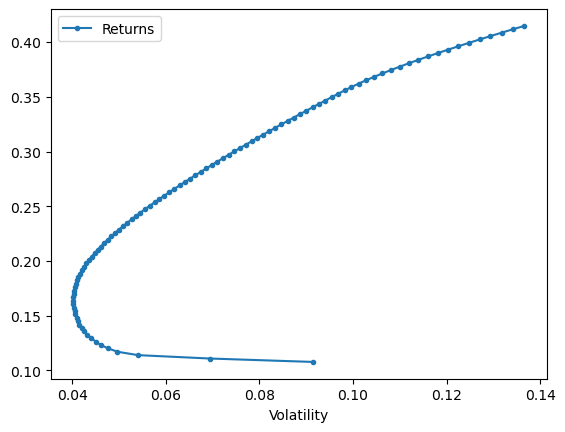

In [13]:
l = ['BusEq', 'Food', 'Smoke', 'Servs', 'Coal', 'Books']
plot_ef(100, er[l], cov.loc[l,l])

In [14]:
er[l]

BusEq    0.271952
Food     0.116799
Smoke    0.107830
Servs    0.175264
Coal     0.414689
Books    0.187286
dtype: float64

In [15]:
cov.loc[l,l]

,BusEq,Food,Smoke,Servs,Coal,Books
BusEq,0.009620,-0.000315,-0.000120,0.007098,0.003240,0.001944
Food,-0.000315,0.002609,0.002061,0.000237,0.000027,0.001035
Smoke,-0.000120,0.002061,0.008349,-0.000218,-0.000733,-0.000128
Servs,0.007098,0.000237,-0.000218,0.007612,0.003013,0.002367
Coal,0.003240,0.000027,-0.000733,0.003013,0.018641,0.002426
Books,0.001944,0.001035,-0.000128,0.002367,0.002426,0.002612


<AxesSubplot:>

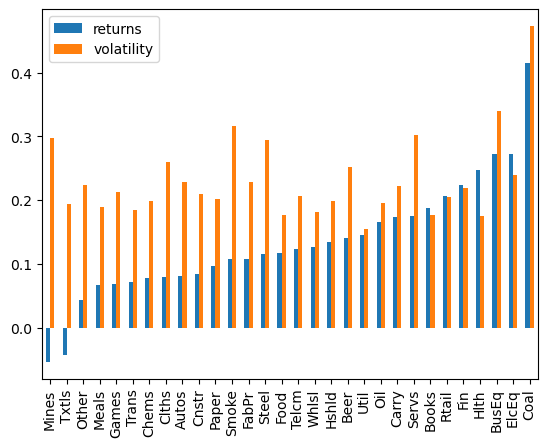

In [16]:
pouf = pd.DataFrame({"returns":er,
        "volatility":vol})
pouf.sort_values(by = "returns").plot.bar()

In [17]:
pouf.index

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [26]:
n_points = 100
data = er[l]
target_rs = np.linspace(data.min(), data.max(), n_points)
pouf = pd.DataFrame(data=target_rs)

In [30]:
er

Food     0.116799
Beer     0.141126
Smoke    0.107830
Games    0.068212
Books    0.187286
Hshld    0.134766
Clths    0.079160
Hlth     0.246641
Chems    0.077456
Txtls   -0.042721
Cnstr    0.084076
Steel    0.115809
FabPr    0.108280
ElcEq    0.272420
Autos    0.080954
Carry    0.173904
Mines   -0.053554
Coal     0.414689
Oil      0.165377
Util     0.145903
Telcm    0.122771
Servs    0.175264
BusEq    0.271952
Paper    0.097163
Trans    0.071099
Whlsl    0.126431
Rtail    0.207247
Meals    0.067400
Fin      0.223371
Other    0.043349
dtype: float64